#1. El problema de puntuación

Se requiere una limpieza de datos con la ayuda de analisis exploratorio de datos para determinar las caracteristicas de las peliculas.

¿Qué peliculas tienen una mayor probabilidad a ser mejor puntuadas?

# 2. Set de datos despues de la limpieza

La información que se recolecto se encuentra en un archivo NetflixOriginals.csv con 584 filas y 6 columnas.

Cada registro contiene 6 caracteristicas las columnas son:

1. "Title": Titulo (alfabetico)
2. "Genre": Género de la pelicula (Categorica: "action","documentary","thriller","science fiction","horror","mystery","comedy","drama","romantic","anthology","political","superhero","animation","family film","interview","family film","adventure","concert Film","musical","biographical","anime","spy","teen comedy","urban fantasy","crime","biopic","war","sports",dark comedy","one-man show","mockumentary","satire","family","black comedy","psychological","supernatural","variety show","christmas musical","aftershow")
3. "Premiere": Fecha de estreno de una película (Numerica: "08/05/2019","August 21, 2020",... )
4. "Runtime": Tiempo de ejecución de la pelicula (Númerica: "58","81","94","147",...)
5. "IMDB score": Calificación promedio de la película (Númerica: "2.5","3.4","4.2",...)
6. "Languaje": (Categorica: "english","spanish","japanese",...)


#3. Una primera mirada al dataset


In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = "/content/drive/MyDrive/NetflixOriginals.csv"
data = pd.read_csv(ruta, encoding='latin1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.shape)
data.head()

(584, 6)


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,08-05-19,58,2.5,English/Japanese
1,Dark Forces,thriller,"August 21, 2020",81,2.6,ESP
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
# Se verán las variables categóricas y las númericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       580 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    583 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


#4. Limpieza

Se realizará el proceso de limpieza teniendo en cuenta las situaciones más comunes:
- Datos faltantes en varias celdas
- Columnas que se pueden tomar irrelevantes (que no resuelven ningun problema)
- Registros repetidos
- Valores extremos, en caso de las variables númericas. Se deben analizar a detalle ya que no necesariamente se necesitan eliminar
- Errores tipográficos en caso de variables categóricas

Al final del proceso de limpieza se deberia tener un set de datos íntegro, listo para el análisis exploratorio.

#4.1 Datos faltantes
Se comienza a ver que los datos no están completos ya que en ciertas columnas no tienen la misma cantidad de registros.

El número total de registro deberia ser de 584. Sin embargo las columas "title" y "language" muestran un registro incompleto.

Por ser pocos datos faltantes se optará por eliminar las filas correspondientes

In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       579 non-null    object 
 1   Genre       579 non-null    object 
 2   Premiere    579 non-null    object 
 3   Runtime     579 non-null    int64  
 4   IMDB Score  579 non-null    float64
 5   Language    579 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 31.7+ KB


#4.2 Columnas irrelevantes

Las columnas irrelevantes podrían ser:
- La columna que no contenga información relevante para el problema que queramos resolver. Por ejemplo, la duración de una pelicula.
- Una columna categórica pero con un sólo nivel. Por ejemplo si la columna "Languaje" solo tuvieramos "Spanish".
- Columnas numéricas pero con un sólo valor. Por ejemplo si en la columna "runtime" todos los valores fueran iguales a 100.

Si se tiene la duda de si alguna columna pudiera ser relevante o no, lo mejor es dejarla y checar si a lo largo del desarollo se pueda notar si se debe preservar o no.
En este caso todas las columnas pueden ser relevantes, pero se debera verificar que no haya columnas categóricas con un solo nival, o columnas de un solo valor.


In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['Title', 'Genre', 'Premiere', 'Language']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna Title: 579 subniveles
Columna Genre: 130 subniveles
Columna Premiere: 397 subniveles
Columna Language: 46 subniveles


Al tener todas las columnas más de 1 subnivel no se elimninará ninguna.

Se verificará que es lo que ocurre con las columnas numéricas:

In [ ]:
data.describe()

,Runtime,IMDB Score
count,579.000000,579.000000
mean,93.497409,6.274784
std,27.846426,0.976765
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.400000
75%,107.500000,7.000000
max,209.000000,9.000000


Todas las columnas numéricas tienen std diferentes de cero, lo que indica que no tienen un valor único.

Se preservaran todas las columnas numéricas.

#4.3 Filas repetidas

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (579, 6)
Tamaño del set después de eliminar las filas repetidas: (579, 6)


#4.4 Outliers en las variables numéricas

No siempre se deben eliminar los outliers porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Se crearan gráficas topo "boxplot" de las columnas numéricas:

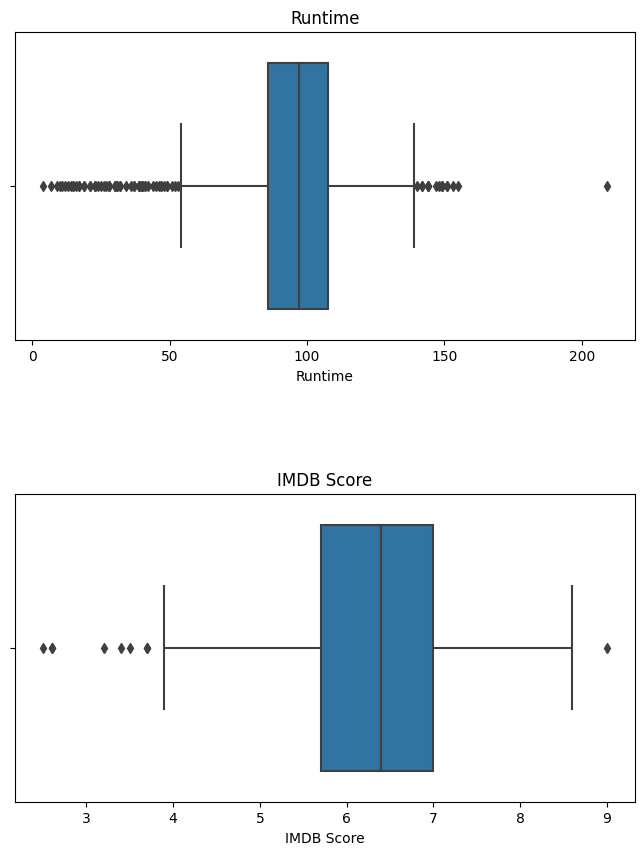

In [ ]:
# Se generan gráficas individuales pues las variables numéricas
# rangos diferentes
cols_num = ['Runtime', 'IMDB Score']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**

- "Runtime": Hay películas menores a 100 y mayores a 100

- "IMDB Score": Hay un valor alto (cercano a *10*)

**No se eliminaran registros ya que los datos son relevantes para estas categorias**

#4.5 Errores tipográficos en variables categóricas

En una variable categorica pueden aparecer subniveles como "Spanish" y "Espanol" ó "English" "ingles" que se puede notar que son equivalentes pero para el programa se verán diferentes.

se unificaran los sub-niveles

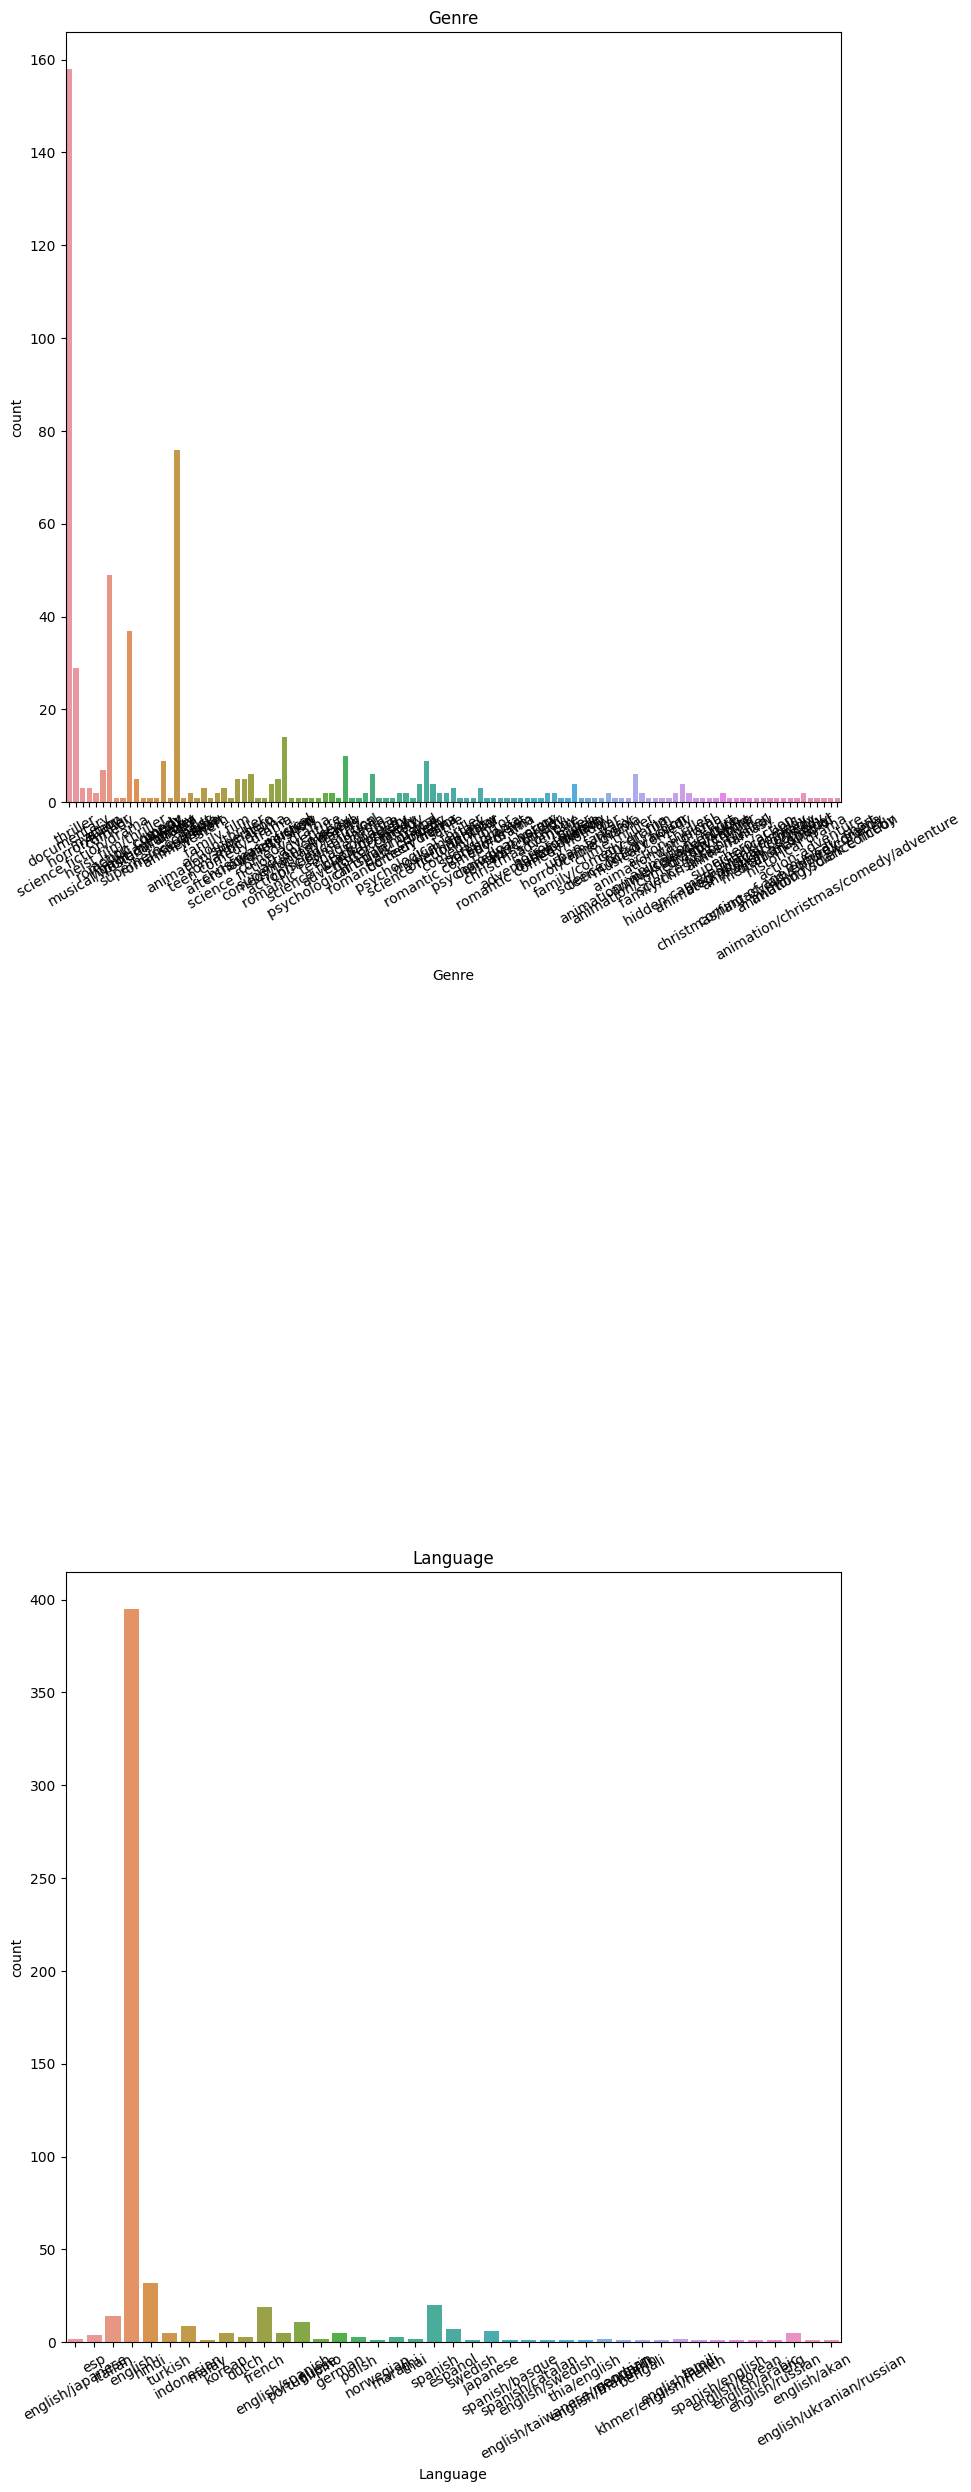

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['Genre','Premiere','Language']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Hay subniveles que cambian por mayúsculas, minúsculas o si se encuentran las palabras abreviadas o completas.

Se unificaran los sub-niveles:

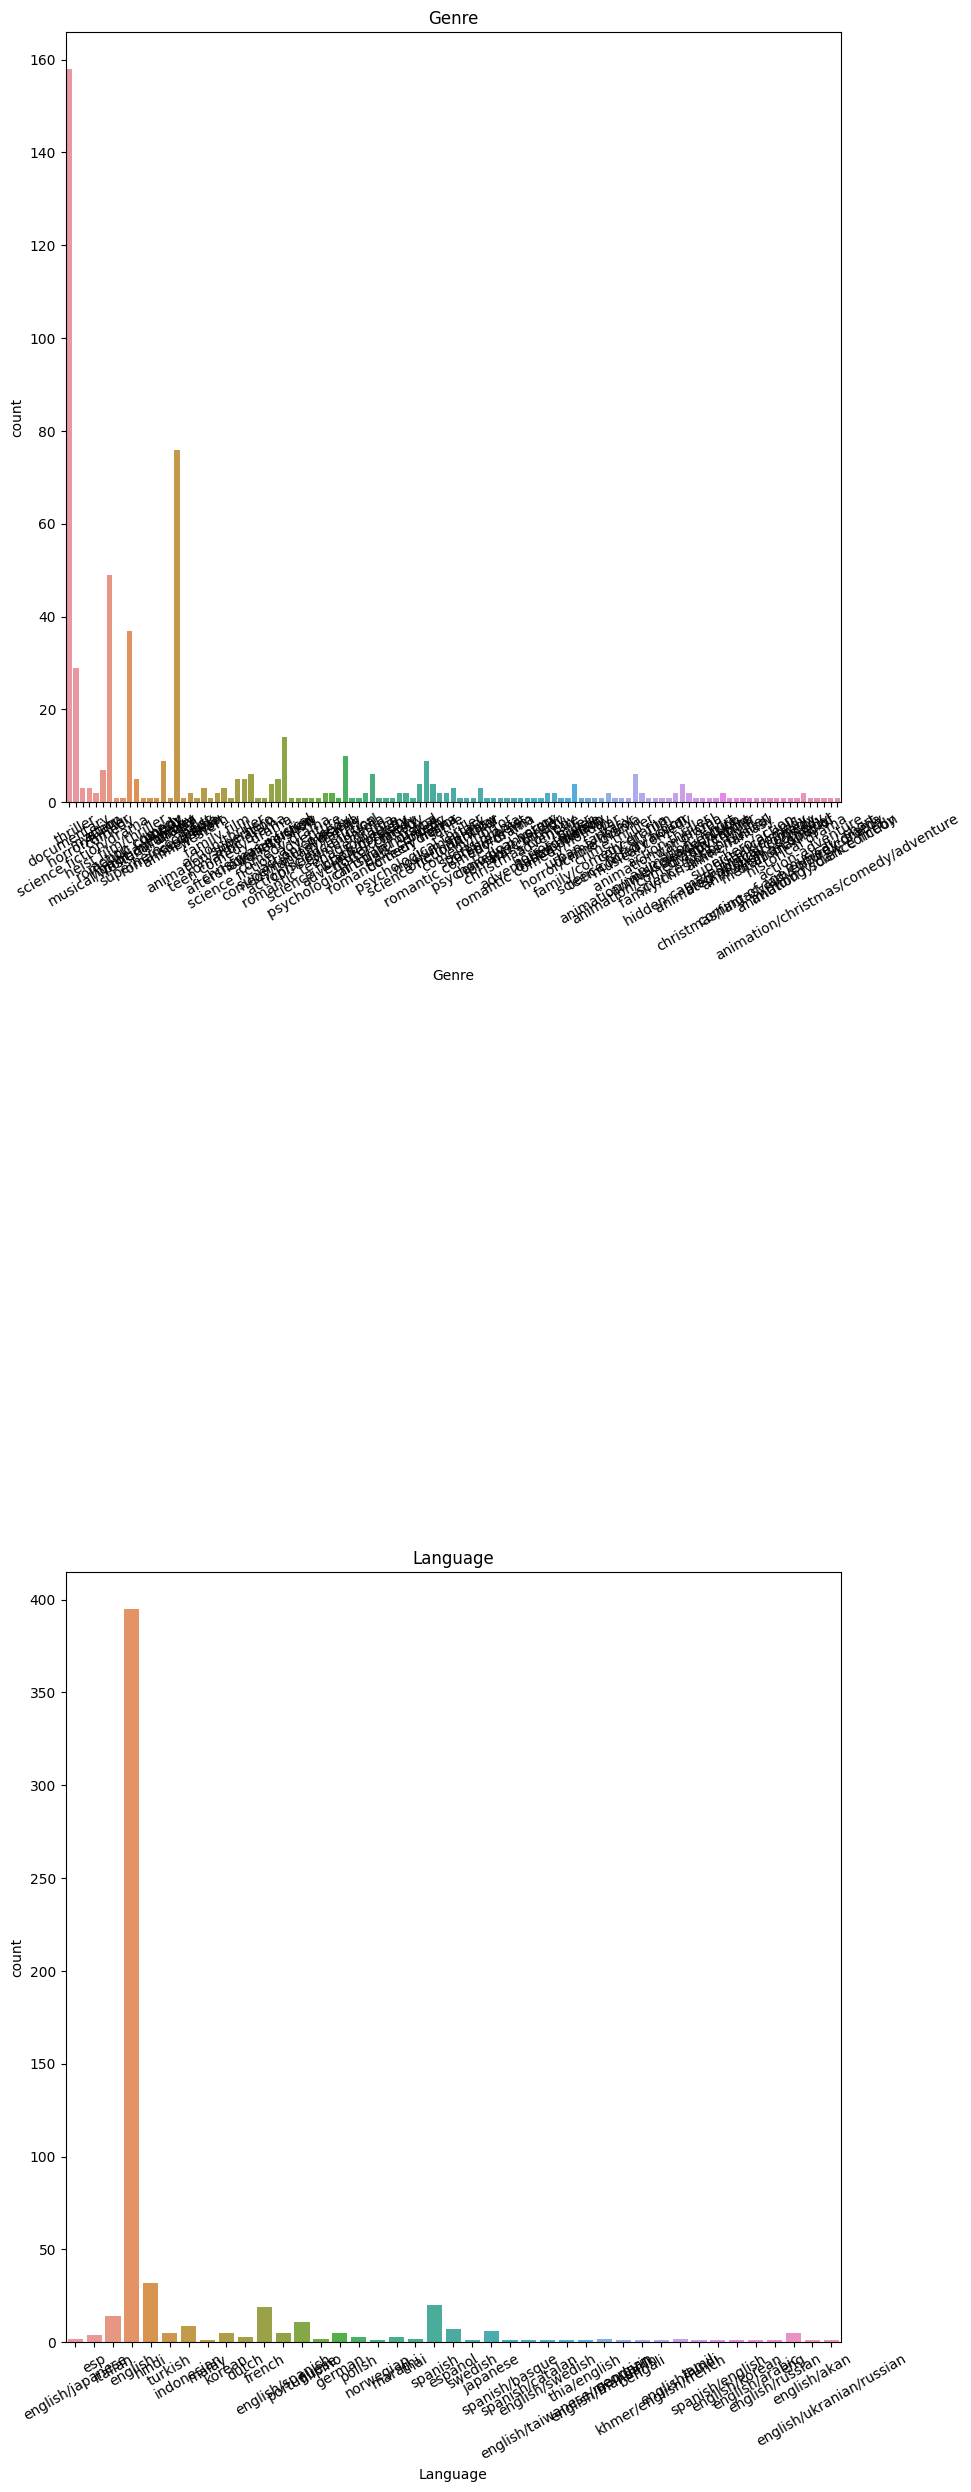

In [ ]:
for column in data.columns:
    # Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

# Y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

In [ ]:
# language: unificar japones y japanese
print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('japones','japanese', regex=False)
print(data['Language'].unique())

# language: unificar ingles y english
print(data['Language'].unique())
data['Language'] = data['Language'].str.replace('ingles','english', regex=False)
print(data['Language'].unique())

['english/japanese' 'esp' 'italian' 'english' 'hindi' 'turkish'
 'indonesian' 'malay' 'korean' 'dutch' 'french' 'english/spanish'
 'portuguese' 'filipino' 'german' 'polish' 'norwegian' 'marathi' 'thai'
 'spanish' 'espanol' 'swedish' 'japanese' 'spanish/basque'
 'spanish/catalan' 'english/swedish' 'english/taiwanese/mandarin'
 'thia/english' 'english/mandarin' 'georgian' 'bengali'
 'khmer/english/french' 'english/hindi' 'tamil' 'spanish/english'
 'english/korean' 'english/arabic' 'english/russian' 'eng' 'english/akan'
 'ingles' 'english/ukranian/russian']
['english/japanese' 'esp' 'italian' 'english' 'hindi' 'turkish'
 'indonesian' 'malay' 'korean' 'dutch' 'french' 'english/spanish'
 'portuguese' 'filipino' 'german' 'polish' 'norwegian' 'marathi' 'thai'
 'spanish' 'espanol' 'swedish' 'japanese' 'spanish/basque'
 'spanish/catalan' 'english/swedish' 'english/taiwanese/mandarin'
 'thia/english' 'english/mandarin' 'georgian' 'bengali'
 'khmer/english/french' 'english/hindi' 'tamil' 'spanish

In [ ]:
# genre: unificar drama y DRAMA
print(data['Genre'].unique())
data['Genre'] = data['Genre'].str.replace('DRAMA','drama', regex=False)
print(data['Genre'].unique())

# genre: unificar thriller y THRILLER
print(data['Genre'].unique())
data['Genre'] = data['Genre'].str.replace('THRILLER','thriller', regex=False)
print(data['Genre'].unique())

['documentary' 'thriller' 'science fiction/drama' 'horror thriller'
 'mystery' 'action' 'comedy' 'heist film/thriller'
 'musical/western/fantasy' 'romantic comedy' 'action comedy'
 'horror anthology' 'political thriller' 'superhero-comedy' 'horror'
 'romance drama' 'drama' 'anime / short' 'superhero' 'heist' 'western'
 'animation/superhero' 'family film' 'action-thriller' 'teen comedy-drama'
 'romantic drama' 'animation' 'aftershow / interview' 'christmas musical'
 'science fiction adventure' 'science fiction' 'variety show'
 'comedy-drama' 'comedy/fantasy/family' 'supernatural drama'
 'action/comedy' 'action/science fiction' 'romantic teenage drama'
 'comedy / musical' 'musical' 'science fiction/mystery' 'crime drama'
 'psychological thriller drama' 'adventure/comedy' 'black comedy'
 'romance' 'horror comedy' 'christian musical' 'romantic teen drama'
 'family' 'dark comedy' 'comedy horror' 'psychological thriller' 'biopic'
 'science fiction/thriller' 'mockumentary' 'satire' 'one-man s

In [ ]:
data.shape

(579, 6)

Finalmente se lográ la limpieza de datos del set

Originalmente se tenian 584 registros y 6 columnas. El dataset resultante tiene 579 (5 menos) y 6 columnas

Y el set se encuentra listo para el análisis exploratorio

In [ ]:
ruta = "/content/drive/MyDrive/NetflixOriginals.csv"
data.to_csv(ruta, index=False)